In [15]:
# Assignment 4: Compare SVM vs Decision Trees
# Dataset: Iris (3-class classification)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [16]:
# -------------------------------
# 1) Load dataset
# -------------------------------
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names  # ['setosa', 'versicolor', 'virginica']

print("Dataset:", "Iris")
print("Samples:", X.shape[0], " Features:", X.shape[1])
print("Classes:", target_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Dataset: Iris
Samples: 150  Features: 4
Classes: ['setosa' 'versicolor' 'virginica']


In [17]:

# -------------------------------
# 2) Utility function
# -------------------------------
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n{name}")
    print("-" * 40)
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1 Score :", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="red")
    plt.show()

    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    }


In [18]:
# -------------------------------
# 3) Models
# -------------------------------

# SVM with Linear kernel
svm_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="linear", random_state=42))
])

# SVM with RBF kernel
svm_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", gamma="scale", random_state=42))
])

# SVM with Polynomial kernel
svm_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="poly", degree=3, gamma="scale", random_state=42)) # Added polynomial kernel
])


# Decision Tree with Gini
dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

# Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)


SVM (Linear Kernel)
----------------------------------------
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score : 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



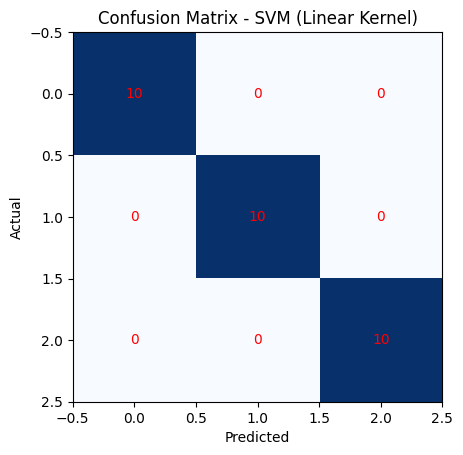

In [19]:

# -------------------------------
# 4) Train & Evaluate
# -------------------------------
results = []
results.append(evaluate_model("SVM (Linear Kernel)", svm_linear, X_train, y_train, X_test, y_test))





SVM (RBF Kernel)
----------------------------------------
Accuracy : 0.9666666666666667
Precision: 0.9696969696969696
Recall   : 0.9666666666666667
F1 Score : 0.9665831244778613

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



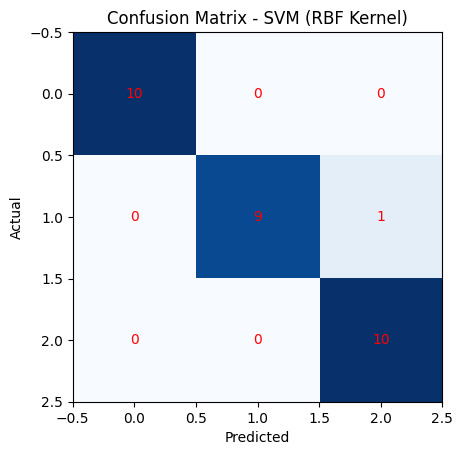

In [20]:
results.append(evaluate_model("SVM (RBF Kernel)", svm_rbf, X_train, y_train, X_test, y_test))


SVM (Polynomial Kernel)
----------------------------------------
Accuracy : 0.9
Precision: 0.9230769230769231
Recall   : 0.9
F1 Score : 0.89769820971867

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.77      1.00      0.87        10
   virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



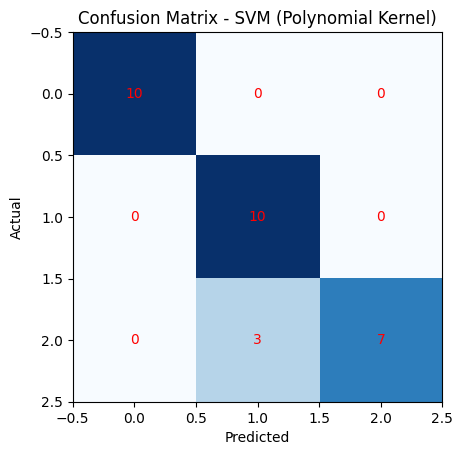

In [21]:
results.append(evaluate_model("SVM (Polynomial Kernel)", svm_poly, X_train, y_train, X_test, y_test))


Decision Tree (Gini)
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1 Score : 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



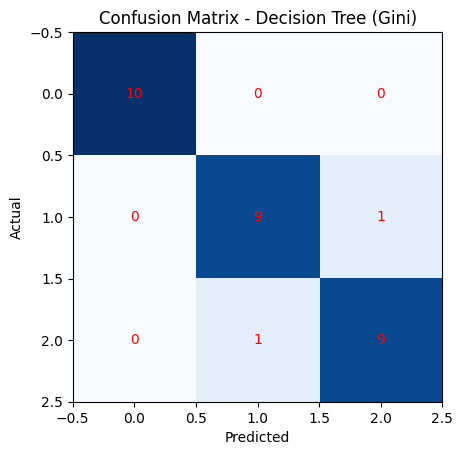

In [22]:

results.append(evaluate_model("Decision Tree (Gini)", dt_gini, X_train, y_train, X_test, y_test))


Decision Tree (Entropy)
----------------------------------------
Accuracy : 0.9333333333333333
Precision: 0.9333333333333333
Recall   : 0.9333333333333333
F1 Score : 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



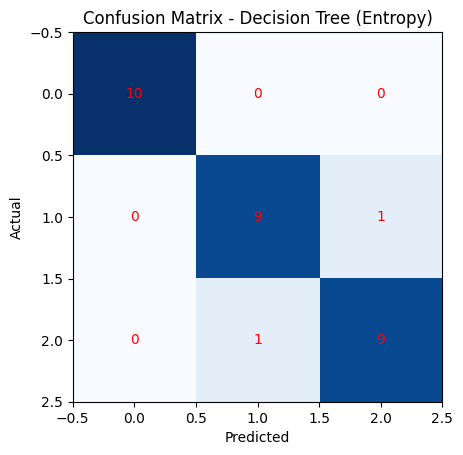

In [23]:

results.append(evaluate_model("Decision Tree (Entropy)", dt_entropy, X_train, y_train, X_test, y_test))

In [24]:
# -------------------------------
# 5) Compare Results
# -------------------------------
results_df = pd.DataFrame(results)
print("\n\nFinal Comparison Table:\n")
print(results_df)



Final Comparison Table:

                     Model  Accuracy  Precision    Recall        F1
0      SVM (Linear Kernel)  1.000000   1.000000  1.000000  1.000000
1         SVM (RBF Kernel)  0.966667   0.969697  0.966667  0.966583
2  SVM (Polynomial Kernel)  0.900000   0.923077  0.900000  0.897698
3     Decision Tree (Gini)  0.933333   0.933333  0.933333  0.933333
4  Decision Tree (Entropy)  0.933333   0.933333  0.933333  0.933333
